In [187]:
#Gestion des imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency, pearsonr
import statsmodels.api as sm
#from statsmodels.formula.api import ols
from statannotations.Annotator import Annotator
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold, cross_val_score 
import pickle
from sklearn.base import BaseEstimator, TransformerMixin

## Import du fichier propre

In [62]:
df=pd.read_csv('cleansed_data.csv', sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


1337 colonnes, on a donc bien récupérer notre csv nettoyé, sans le doublon

In [63]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Régression linéaire basique

In [64]:
## Test régression linéaires simple
X = df.drop(columns=["charges"]) 
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(), ["smoker"]),  # Encodage ordinal pour 'smoker'
        ("onehot", OneHotEncoder(sparse_output=False), ["sex", "region"]),  # OneHotEncoding pour 'sex' et 'region'
        ("scaler", StandardScaler(), ["age", "bmi", "children"])
    ],
remainder="drop" #suppression des colonnes non spécifiées
)

pipe=make_pipeline(preprocessor, LinearRegression())
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(),
                                                  ['smoker']),
                                                 ('onehot',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['sex', 'region']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('linearregression', LinearRegression())])

In [65]:
pipe.score(X_train, y_train)

0.7299057809339075

In [66]:
pipe.score(X_test, y_test)

0.8069287081198013

## Test encodage bmi

In [67]:
X = df.drop(columns=["charges"]) 
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Encodage des datas : 
enc = OrdinalEncoder()
encods = enc.fit(df[["smoker"]])
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[['sex','region']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['sex','region']))

#df_encoded = pd.concat([df.drop(columns=['sex','smoker','region']), encoded_df])
df_encoded = pd.concat([df.drop(columns=['sex','region']), encoded_df], axis=1)


df_encoded

pipe = make_pipeline(enc, encoder, StandardScaler(), LinearRegression())
pipe.fit(X_train, y_train) 

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('onehotencoder', OneHotEncoder(sparse_output=False)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [69]:
df_encoded

,age,bmi,children,smoker,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,yes,16884.92400,1.0,0.0,0.0,0.0,0.0,1.0
1,18,33.770,1,no,1725.55230,0.0,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,no,4449.46200,0.0,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,no,21984.47061,0.0,1.0,0.0,1.0,0.0,0.0
4,32,28.880,0,no,3866.85520,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1332,50,30.970,3,no,10600.54830,0.0,1.0,0.0,1.0,0.0,0.0
1333,18,31.920,0,no,2205.98080,1.0,0.0,1.0,0.0,0.0,0.0
1334,18,36.850,0,no,1629.83350,1.0,0.0,0.0,0.0,1.0,0.0
1335,21,25.800,0,no,2007.94500,1.0,0.0,0.0,0.0,0.0,1.0


In [68]:
pipe.score(X_train, y_train)

0.8790853893438216

In [70]:
pipe.score(X_test, y_test)

ValueError: Found unknown categories [np.float64(17.765), np.float64(18.05), np.float64(18.335), np.float64(18.6), np.float64(19.57), np.float64(21.09), np.float64(21.3), np.float64(21.565), np.float64(22.77), np.float64(22.88), np.float64(23.32), np.float64(23.54), np.float64(23.9), np.float64(23.94), np.float64(24.3), np.float64(24.53), np.float64(24.75), np.float64(24.97), np.float64(27.8), np.float64(28.2), np.float64(29.165), np.float64(29.59), np.float64(31.1), np.float64(31.8), np.float64(33.06), np.float64(34.485), np.float64(35.09), np.float64(35.64), np.float64(36.29), np.float64(36.6), np.float64(37.7), np.float64(38.285), np.float64(38.9), np.float64(38.95), np.float64(39.52), np.float64(40.47), np.float64(40.48), np.float64(42.35), np.float64(42.46), np.float64(42.655), np.float64(42.68), np.float64(43.4), np.float64(44.0), np.float64(44.7), np.float64(46.2), np.float64(46.75), np.float64(47.41), np.float64(47.6), np.float64(48.07)] in column 2 during transform

In [20]:
from sklearn.preprocessing import OneHotEncoder

# Instanciation du OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
bmi_encoded = encoder.fit_transform(df[['bmi']])

# Conversion en DataFrame
bmi_encoded_df = pd.DataFrame(bmi_encoded, columns=encoder.get_feature_names_out(['bmi_category']))

# Fusion avec le DataFrame initial
df_encoded = pd.concat([df.drop(columns=['bmi']), bmi_encoded_df], axis=1)
print(df_encoded)


ValueError: input_features is not equal to feature_names_in_

In [48]:
X = df.drop(columns=["charges"]) 
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Encodage des datas : 
enc = OrdinalEncoder()
encods = enc.fit(df[["smoker"]])
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[['sex','region']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['sex','region']))

#df_encoded = pd.concat([df.drop(columns=['sex','smoker','region']), encoded_df])
df_encoded = pd.concat([df.drop(columns=['sex','region']), encoded_df], axis=1)
discretizer = KBinsDiscretizer(n_bins=5, encode="onehot", strategy="quantile")
df_encoded = discretizer.fit_transform(df_encoded[['bmi']])
#df_encoded = df_encoded.reset_index(drop=True)
final_df = pd.DataFrame(df_encoded, columns=discretizer.get_feature_names_out(['bmi']))
df_encoded

pipe = make_pipeline(enc, encoder, StandardScaler(), LinearRegression())
pipe.fit(X_train, y_train) 

ValueError: Shape of passed values is (4, 1), indices imply (4, 5)

In [54]:
encoded_df

,sex_female,sex_male,region_northwest,region_southeast,region_southwest
0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, KBinsDiscretizer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Séparation des données
X = df.drop(columns=["charges"])
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encodage des données
# 1. Ordinal Encoding pour 'smoker'
enc = OrdinalEncoder()
X_train['smoker'] = enc.fit_transform(X_train[['smoker']])
X_test['smoker'] = enc.transform(X_test[['smoker']])

# 2. OneHotEncoding pour 'sex' et 'region'
encoder = OneHotEncoder(sparse_output=False)
encoded_train = encoder.fit_transform(X_train[['sex', 'region']])
encoded_test = encoder.transform(X_test[['sex', 'region']])

# Concaténation des colonnes encodées avec le reste des données
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(['sex', 'region']))
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(['sex', 'region']))

X_train = pd.concat([X_train.drop(columns=['sex', 'region']), encoded_train_df], axis=1)
X_test = pd.concat([X_test.drop(columns=['sex', 'region']), encoded_test_df], axis=1)

# 3. Discrétisation de la colonne 'bmi'
discretizer = KBinsDiscretizer(n_bins=5, encode="onehot", strategy="quantile")
bmi_train = discretizer.fit_transform(X_train[['bmi']])
bmi_test = discretizer.transform(X_test[['bmi']])

bmi_train_df = pd.DataFrame(bmi_train, columns=[f'bmi_bin_{i}' for i in range(bmi_train.shape[1])])
bmi_test_df = pd.DataFrame(bmi_test, columns=[f'bmi_bin_{i}' for i in range(bmi_test.shape[1])])

X_train = pd.concat([X_train.drop(columns=['bmi']), bmi_train_df], axis=1)
X_test = pd.concat([X_test.drop(columns=['bmi']), bmi_test_df], axis=1)

# Voir le DataFrame final
print("X_train après encodage et discrétisation :")
print(X_train.head())

# Pipeline pour apprentissage
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train, y_train)

# Résultats
print("Score sur l'ensemble d'entraînement :", pipe.score(X_train, y_train))
print("Score sur l'ensemble de test :", pipe.score(X_test, y_test))


ValueError: Input X contains NaN.
KBinsDiscretizer does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [31]:
pipe.score(X_train, y_train)

0.8790853893438216

In [32]:
pipe.score(X_test, y_test)

ValueError: Found unknown categories [np.float64(17.765), np.float64(18.05), np.float64(18.335), np.float64(18.6), np.float64(19.57), np.float64(21.09), np.float64(21.3), np.float64(21.565), np.float64(22.77), np.float64(22.88), np.float64(23.32), np.float64(23.54), np.float64(23.9), np.float64(23.94), np.float64(24.3), np.float64(24.53), np.float64(24.75), np.float64(24.97), np.float64(27.8), np.float64(28.2), np.float64(29.165), np.float64(29.59), np.float64(31.1), np.float64(31.8), np.float64(33.06), np.float64(34.485), np.float64(35.09), np.float64(35.64), np.float64(36.29), np.float64(36.6), np.float64(37.7), np.float64(38.285), np.float64(38.9), np.float64(38.95), np.float64(39.52), np.float64(40.47), np.float64(40.48), np.float64(42.35), np.float64(42.46), np.float64(42.655), np.float64(42.68), np.float64(43.4), np.float64(44.0), np.float64(44.7), np.float64(46.2), np.float64(46.75), np.float64(47.41), np.float64(47.6), np.float64(48.07)] in column 2 during transform

In [71]:

# Séparation des données
X = df.drop(columns=["charges"])
y = df["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Préprocessing avec ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(), ["smoker"]),  # Encodage ordinal pour 'smoker'
        ("onehot", OneHotEncoder(sparse_output=False), ["sex", "region"]),  # OneHotEncoding pour 'sex' et 'region'
        ("bmi_bins", KBinsDiscretizer(n_bins=5, encode="onehot", strategy="quantile"), ["bmi"]),  # Discrétisation pour 'bmi'
        ("scaler", StandardScaler(), ["age", "children"])  # Standardisation des autres colonnes continues
    ],
    remainder="drop"  # Suppression des colonnes non spécifiées
)

# Pipeline avec Linear Regression
pipe = make_pipeline(preprocessor, LinearRegression())
pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(),
                                                  ['smoker']),
                                                 ('onehot',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['sex', 'region']),
                                                 ('bmi_bins',
                                                  KBinsDiscretizer(), ['bmi']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'children'])])),
                ('linearregression', LinearRegression())])

In [72]:
# Évaluation du modèle
train_score = pipe.score(X_train, y_train)
test_score = pipe.score(X_test, y_test)

print("Score sur l'ensemble d'entraînement :", train_score)
print("Score sur l'ensemble de test :", test_score)

Score sur l'ensemble d'entraînement : 0.7335233332460795
Score sur l'ensemble de test : 0.8046931482092067


In [78]:
X_train_transformed = preprocessor.fit_transform(X_train)
# # Pour obtenir les noms des colonnes après transformation
transformed_columns = (
    preprocessor.named_transformers_["onehot"].get_feature_names_out(["sex", "region"]).tolist()
    + preprocessor.named_transformers_["bmi_bins"].get_feature_names_out(["bmi"]).tolist()
    + ["smoker"]  # Pour la colonne transformée par OrdinalEncoder
    + ["age", "children"]  # Colonnes standardisées
)

# Convertir en DataFrame pour inspection
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=transformed_columns)

X_train_transformed_df

,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,bmi_0.0,bmi_1.0,bmi_2.0,bmi_3.0,bmi_4.0,smoker,age,children
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.157680,-0.907908
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.300619,0.766904
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.914926,0.766904
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.701087,-0.907908
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.557580,0.766904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.843457,0.766904
1065,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.871804,0.766904
1066,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.372088,-0.070502
1067,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.085643,1.604310


#### Truc de Hacene et Vic

In [81]:
# Définir les tranches de BMI
#bins = [0, 18.5, 24.9, 29.9, 40, 100]  # Tranches de BMI
# labels = ['Sous-poids', 'Poids normal', 'Surpoids', 'Obésité', 'Obésité sévère']
bins = [0, 29.999, 100]  # Tranches de BMI
labels = ['Normal weight', 'Obesity']

# Ajouter une nouvelle colonne dans le DataFrame pour les tranches de BMI
df["bmi_category"] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)
df

,age,sex,bmi,children,smoker,region,charges,BMI_category,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,Poids normal,Normal weight
1,18,male,33.770,1,no,southeast,1725.55230,Obésité,Obesity
2,28,male,33.000,3,no,southeast,4449.46200,Obésité,Obesity
3,33,male,22.705,0,no,northwest,21984.47061,Poids normal,Normal weight
4,32,male,28.880,0,no,northwest,3866.85520,Poids normal,Normal weight
...,...,...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830,Obésité,Obesity
1333,18,female,31.920,0,no,northeast,2205.98080,Obésité,Obesity
1334,18,female,36.850,0,no,southeast,1629.83350,Obésité,Obesity
1335,21,female,25.800,0,no,southwest,2007.94500,Poids normal,Normal weight


In [203]:
class BmiTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None, k=29.999):
        self.columns = columns 
        self.k = k
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X0):
        X = pd.DataFrame(X0)
        if self.columns == "bmi":
            bins = [0, self.k, 100] 
            labels = [0, 1]
            X["bmi_category"] = pd.cut(X['bmi'], bins=bins, labels=labels, right=False)
        else:
            raise ValueError("Vous devez spécifier les colonnes à transformer.")
        return X

In [86]:
#Test avec la pipeline

X = df.drop(columns=["charges"]) 
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(), ["smoker"]),  # Encodage ordinal pour 'smoker'
        ("onehot", OneHotEncoder(sparse_output=False), ["sex", "region", "bmi_category"]),  # OneHotEncoding pour 'sex' et 'region'
        ("scaler", StandardScaler(), ["age", "children"])
    ],
remainder="drop" #suppression des colonnes non spécifiées
)

pipe=make_pipeline(preprocessor, LinearRegression())
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(),
                                                  ['smoker']),
                                                 ('onehot',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['sex', 'region',
                                                   'bmi_category']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'children'])])),
                ('linearregression', LinearRegression())])

In [87]:
pipe.score(X_train, y_train)

0.7360889122997528

In [88]:
pipe.score(X_test, y_test)

0.8013273957493908

In [89]:
#Test avec Polynomial  features

X = df.drop(columns=["charges"]) 
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(), ["smoker"]),  # Encodage ordinal pour 'smoker'
        ("onehot", OneHotEncoder(sparse_output=False), ["sex", "region", "bmi_category"]),  # OneHotEncoding pour 'sex' et 'region'
        ("scaler", StandardScaler(), ["age", "children"])
    ],
remainder="drop" #suppression des colonnes non spécifiées
)
polynomial = PolynomialFeatures(degree=2)
pipe=make_pipeline(preprocessor,polynomial, LinearRegression())
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(),
                                                  ['smoker']),
                                                 ('onehot',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['sex', 'region',
                                                   'bmi_category']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'children'])])),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [93]:
score_train = pipe.score(X_train, y_train)
score_test = pipe.score(X_test, y_test)
print(f'score train : {score_train} - score test : {score_test}')

score train : 0.8543032419344369 - score test : 0.9008477204415419


In [105]:
# Test avec Lasso

X = df.drop(columns=["charges"]) 
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['smoker'])

preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(), ["smoker"]),  # Encodage ordinal pour 'smoker'
        ("onehot", OneHotEncoder(sparse_output=False), ["sex", "region", "bmi_category"]),  # OneHotEncoding pour 'sex' et 'region'
        ("scaler", StandardScaler(), ["age", "children"])
    ],
remainder="drop" #suppression des colonnes non spécifiées
)
polynomial = PolynomialFeatures(degree=2, interaction_only=False)
pipe=make_pipeline(preprocessor,polynomial,StandardScaler(), Lasso(alpha=10, random_state=42))
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(),
                                                  ['smoker']),
                                                 ('onehot',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['sex', 'region',
                                                   'bmi_category']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'children'])])),
                ('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=10, random_state=42))])

In [106]:
score_train = pipe.score(X_train, y_train)
score_test = pipe.score(X_test, y_test)
print(f'score train : {score_train} - score test : {score_test}')

score train : 0.8545698797990318 - score test : 0.9143328377078817


In [100]:
X = df.drop(columns=["charges"]) 
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['smoker'])


param_grid = {
    'polynomialfeatures__degree': [2, 3],  # Tester des degrés plus élevés
    'lasso__alpha': [0.1, 0.5, 1, 10],  # Tester différentes régularisations
    'lasso__max_iter': [1000, 5000, 10000]  # Vérifier si des itérations supplémentaires aident
}

grid = GridSearchCV(pipe, param_grid, scoring='r2', cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# Résultats
print("Meilleurs paramètres :", grid.best_params_)
print("Meilleur score R² (validation croisée) :", grid.best_score_)
print("Score sur l'ensemble de test :", grid.score(X_test, y_test))


/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.635e+09, tolerance: 1.260e+07
  model = cd_fast.enet_coordinate_descent(
/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.471e+08, tolerance: 1.250e+07
  model = cd_fast.enet_coordinate_descent(
/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

Meilleurs paramètres : {'lasso__alpha': 10, 'lasso__max_iter': 1000, 'polynomialfeatures__degree': 2}
Meilleur score R² (validation croisée) : 0.8427984683668933
Score sur l'ensemble de test : 0.9143328377078817


In [107]:
# Test avec Lasso mais en ordinal encoder

X = df.drop(columns=["charges"]) 
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['smoker'])

preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(), ["smoker", "bmi_category"]),  # Encodage ordinal pour 'smoker'
        ("onehot", OneHotEncoder(sparse_output=False), ["sex", "region"]),  # OneHotEncoding pour 'sex' et 'region'
        ("scaler", StandardScaler(), ["age", "children"])
    ],
remainder="drop" #suppression des colonnes non spécifiées
)
polynomial = PolynomialFeatures(degree=2, interaction_only=False)
pipe=make_pipeline(preprocessor,polynomial,StandardScaler(), Lasso(alpha=10, random_state=42))
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(),
                                                  ['smoker', 'bmi_category']),
                                                 ('onehot',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['sex', 'region']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'children'])])),
                ('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=10, random_state=42))])

In [108]:
score_train = pipe.score(X_train, y_train)
score_test = pipe.score(X_test, y_test)
print(f'score train : {score_train} - score test : {score_test}')

score train : 0.8545541979248288 - score test : 0.9144208366407791


In [109]:
X = df.drop(columns=["charges"]) 
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['smoker'])


param_grid = {
    'polynomialfeatures__degree': [2, 3],  # Tester des degrés plus élevés
    'lasso__alpha': [0.1, 0.5, 1, 10],  # Tester différentes régularisations
    'lasso__max_iter': [1000, 5000, 10000]  # Vérifier si des itérations supplémentaires aident
}

grid = GridSearchCV(pipe, param_grid, scoring='r2', cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# Résultats
print("Meilleurs paramètres :", grid.best_params_)
print("Meilleur score R² (validation croisée) :", grid.best_score_)
print("Score sur l'ensemble de test :", grid.score(X_test, y_test))

/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.481e+09, tolerance: 1.250e+07
  model = cd_fast.enet_coordinate_descent(
/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.890e+09, tolerance: 1.206e+07
  model = cd_fast.enet_coordinate_descent(
/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

Meilleurs paramètres : {'lasso__alpha': 10, 'lasso__max_iter': 1000, 'polynomialfeatures__degree': 2}
Meilleur score R² (validation croisée) : 0.8428834759623433
Score sur l'ensemble de test : 0.9144208366407791


/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.363e+08, tolerance: 1.289e+07
  model = cd_fast.enet_coordinate_descent(


Le lasso est toujours haut, il faut tester avec des lasso plus hauts + faires des tests log genre (test de robustscaler sur la catégorie de l'âge pour recentrer le problème)

In [113]:
#Test avec le robustscaler sur l'âge

X = df.drop(columns=["charges"]) 
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['smoker'])

preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(), ["smoker"]),  # Encodage ordinal pour 'smoker'
        ("onehot", OneHotEncoder(sparse_output=False), ["sex", "region", "bmi_category"]),  # OneHotEncoding pour 'sex' et 'region'
        ("scaler", StandardScaler(), ["children"]),
        ("r_scaler", RobustScaler(), ["age"])
    ],
remainder="drop" #suppression des colonnes non spécifiées
)
polynomial = PolynomialFeatures(degree=2, interaction_only=False)
pipe=make_pipeline(preprocessor,polynomial,StandardScaler(), Lasso(alpha=10, random_state=42))
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(),
                                                  ['smoker']),
                                                 ('onehot',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['sex', 'region',
                                                   'bmi_category']),
                                                 ('scaler', StandardScaler(),
                                                  ['children']),
                                                 ('r_scaler', RobustScaler(),
                                                  ['age'])])),
                ('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=10, random_state=42))])

In [114]:
score_train = pipe.score(X_train, y_train)
score_test = pipe.score(X_test, y_test)
print(f'score train : {score_train} - score test : {score_test}')

score train : 0.8545699538403492 - score test : 0.9143316826617246


In [115]:
X = df.drop(columns=["charges"]) 
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['smoker'])


param_grid = {
    'polynomialfeatures__degree': [2, 3],  # Tester des degrés plus élevés
    'lasso__alpha': [0.1, 0.5, 1, 10],  # Tester différentes régularisations
    'lasso__max_iter': [1000, 5000, 10000]  # Vérifier si des itérations supplémentaires aident
}

grid = GridSearchCV(pipe, param_grid, scoring='r2', cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# Résultats
print("Meilleurs paramètres :", grid.best_params_)
print("Meilleur score R² (validation croisée) :", grid.best_score_)
print("Score sur l'ensemble de test :", grid.score(X_test, y_test))

/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.176e+09, tolerance: 1.283e+07
  model = cd_fast.enet_coordinate_descent(
/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.556e+09, tolerance: 1.260e+07
  model = cd_fast.enet_coordinate_descent(
/home/ludivine/Documents/prime_assurance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

Meilleurs paramètres : {'lasso__alpha': 10, 'lasso__max_iter': 1000, 'polynomialfeatures__degree': 2}
Meilleur score R² (validation croisée) : 0.842797067927512
Score sur l'ensemble de test : 0.9143316826617246


In [124]:
# Test avec un log1p sur y

X = df.drop(columns=["charges"]) 
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['smoker'])

preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(), ["smoker"]),  # Encodage ordinal pour 'smoker'
        ("onehot", OneHotEncoder(sparse_output=False), ["sex", "region", "bmi_category"]),  # OneHotEncoding pour 'sex' et 'region'
        ("scaler", StandardScaler(), ["children"]),
        ("r_scaler", RobustScaler(), ["age"])
    ],
remainder="drop" #suppression des colonnes non spécifiées
)
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

polynomial = PolynomialFeatures(degree=2, interaction_only=False)
pipe=make_pipeline(preprocessor,polynomial,StandardScaler(), Lasso(alpha=0.001, random_state=42))
pipe.fit(X_train, y_train_log)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(),
                                                  ['smoker']),
                                                 ('onehot',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['sex', 'region',
                                                   'bmi_category']),
                                                 ('scaler', StandardScaler(),
                                                  ['children']),
                                                 ('r_scaler', RobustScaler(),
                                                  ['age'])])),
                ('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.001, random_state=42))])

In [125]:
# Prédictions et transformation inverse
y_pred_log = pipe.predict(X_test)
y_pred = np.expm1(y_pred_log)
# Évaluation
r2_score_log = pipe.score(X_test, y_test_log)  # Score sur les données transformées
r2_score_original = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2)) 


print(f"R² sur les données transformées (log1p) : {r2_score_log}")
print(f"R² sur les données originales : {r2_score_original}")

R² sur les données transformées (log1p) : 0.9201985929064834
R² sur les données originales : 0.9100470633646662


In [128]:
X = df.drop(columns=["charges"]) 
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['smoker'])


param_grid = {
    'polynomialfeatures__degree': [2, 3],  # Tester des degrés plus élevés
    'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100],  # Tester différentes régularisations
    'lasso__max_iter': [1000, 5000, 10000]  # Vérifier si des itérations supplémentaires aident
}

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
grid = GridSearchCV(pipe, param_grid, scoring='r2', cv=5, n_jobs=-1)
grid.fit(X_train, y_train_log)

# Résultats
print("Meilleurs paramètres :", grid.best_params_)
print("Meilleur score R² (validation croisée) :", grid.best_score_)
print("Score sur l'ensemble de test :", grid.score(X_test, y_test_log))

Meilleurs paramètres : {'lasso__alpha': 0.01, 'lasso__max_iter': 1000, 'polynomialfeatures__degree': 3}
Meilleur score R² (validation croisée) : 0.8131807026712299
Score sur l'ensemble de test : 0.9161626363185873


In [136]:
# Vérification du df après transformation

X_train_transformed = preprocessor.fit_transform(X_train)

# # Pour obtenir les noms des colonnes après transformation
# transformed_columns = (
#     preprocessor.named_transformers_["onehot"].get_feature_names_out(["sex", "region"]).tolist()
#     + preprocessor.named_transformers_["ordinal"].get_feature_names_out(["smoker", "bmi_category"]).tolist() # Pour la colonne transformée par OrdinalEncoder
#     + ["age", "children"]  # Colonnes standardisées
# )

# Convertir en DataFrame pour inspection
X_train_transformed_df = pd.DataFrame(X_train_transformed)

X_train_transformed_df.tail(100)

,0,1,2,3,4,5,6,7,8,9,10
969,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.769598,0.52
970,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.769598,0.00
971,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.769598,0.16
972,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.462398,0.36
973,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.615998,-0.72
...,...,...,...,...,...,...,...,...,...,...,...
1064,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.923201,0.24
1065,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.923201,0.76
1066,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.076801,-0.28
1067,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.923201,0.80


On voit quand même clairement que la colonne bmi a disparu...

In [141]:
#Meilleure combinaison
X = df.drop(columns=["charges"]) 
y = df["charges"]

X = df.drop(columns=["charges"]) 
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['smoker'])

preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(), ["smoker"]),  # Encodage ordinal pour 'smoker'
        ("onehot", OneHotEncoder(sparse_output=False), ["sex", "region", "bmi_category"]),  # OneHotEncoding pour 'sex' et 'region'
        ("scaler", StandardScaler(), ["children"]),
        ("r_scaler", RobustScaler(), ["age"])
    ],
remainder="drop" #suppression des colonnes non spécifiées
)
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

polynomial = PolynomialFeatures(degree=3, interaction_only=False)
pipe=make_pipeline(preprocessor,polynomial,StandardScaler(), Lasso(alpha=0.01, random_state=42))
pipe.fit(X_train, y_train_log)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(),
                                                  ['smoker']),
                                                 ('onehot',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['sex', 'region',
                                                   'bmi_category']),
                                                 ('scaler', StandardScaler(),
                                                  ['children']),
                                                 ('r_scaler', RobustScaler(),
                                                  ['age'])])),
                ('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.01, random_state=42))])

In [142]:
# Prédictions et transformation inverse
y_pred_log = pipe.predict(X_test)
y_pred = np.expm1(y_pred_log)
# Évaluation
r2_score_log = pipe.score(X_test, y_test_log)  # Score sur les données transformées
r2_score_original = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2)) 


print(f"R² sur les données transformées (log1p) : {r2_score_log}")
print(f"R² sur les données originales : {r2_score_original}")

R² sur les données transformées (log1p) : 0.9161626363185873
R² sur les données originales : 0.9022859569628026


La transfo log semble meilleure sur lorsqu'on score sur les données transformées, mais une fois revenu sur les originales on perds en efficacité.... Pas sur dans ce cas que le log soit nécessaire ?!

In [143]:
#Meilleur modèle sans log1p sur la cible


X = df.drop(columns=["charges"]) 
y = df["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['smoker'])

preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(), ["smoker"]),  # Encodage ordinal pour 'smoker'
        ("onehot", OneHotEncoder(sparse_output=False), ["sex", "region", "bmi_category"]),  # OneHotEncoding pour 'sex' et 'region'
        ("scaler", StandardScaler(), ["children"]),
        ("r_scaler", RobustScaler(), ["age"])
    ],
remainder="drop" #suppression des colonnes non spécifiées
)
polynomial = PolynomialFeatures(degree=2, interaction_only=False)
pipe=make_pipeline(preprocessor,polynomial,StandardScaler(), Lasso(alpha=10, random_state=42))
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(),
                                                  ['smoker']),
                                                 ('onehot',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['sex', 'region',
                                                   'bmi_category']),
                                                 ('scaler', StandardScaler(),
                                                  ['children']),
                                                 ('r_scaler', RobustScaler(),
                                                  ['age'])])),
                ('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=10, random_state=42))])

In [144]:
score_train = pipe.score(X_train, y_train)
score_test = pipe.score(X_test, y_test)
print(f'score train : {score_train} - score test : {score_test}')

score train : 0.8545699538403492 - score test : 0.9143316826617246


## Analyse et Résultats du modèle

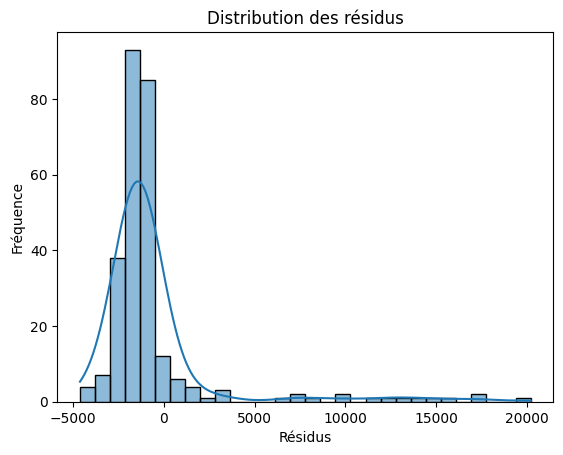

In [145]:
#Distribution des résidus

y_pred = pipe.predict(X_test)
residuals = y_test - y_pred

sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution des résidus")
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.show()

La distribution des résidus suit une loi normale mais qui n'est pas centrée sur 0. Elle semble suivre un peu la distribution des charges initialement. 
En gros ici ça dit qu'on a un biais systématique

In [167]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error : {mse}")
print(f"R² Score : {r2}")


Mean Squared Error : 12349561.254708728
R² Score : 0.9143316826617246


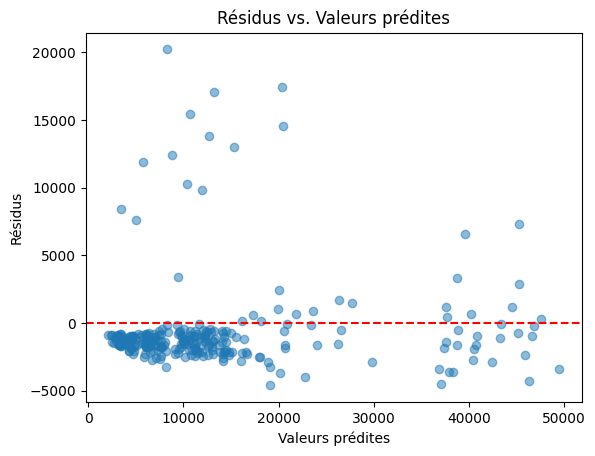

In [146]:
#Graphique résidus vs valeurs prédites

plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Résidus vs. Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.show()

De la même façon les valeurs devraient être proche de 0 sans structure claire... Est-ce vraiment le cas ici ?! ...

                                              Feature  Coefficient
20       ordinal__smoker onehot__bmi_category_Obesity  6172.184646
1                                     ordinal__smoker  5023.053783
11                                      r_scaler__age  3277.289531
10                                   scaler__children   840.553950
77                                    r_scaler__age^2   715.541575
..                                                ...          ...
7                            onehot__region_southwest  -132.285926
36          onehot__sex_male onehot__region_southeast  -137.561029
21                   ordinal__smoker scaler__children  -143.186190
75                                 scaler__children^2  -193.655820
65  onehot__region_southwest onehot__bmi_category_...  -245.135509

[78 rows x 2 columns]


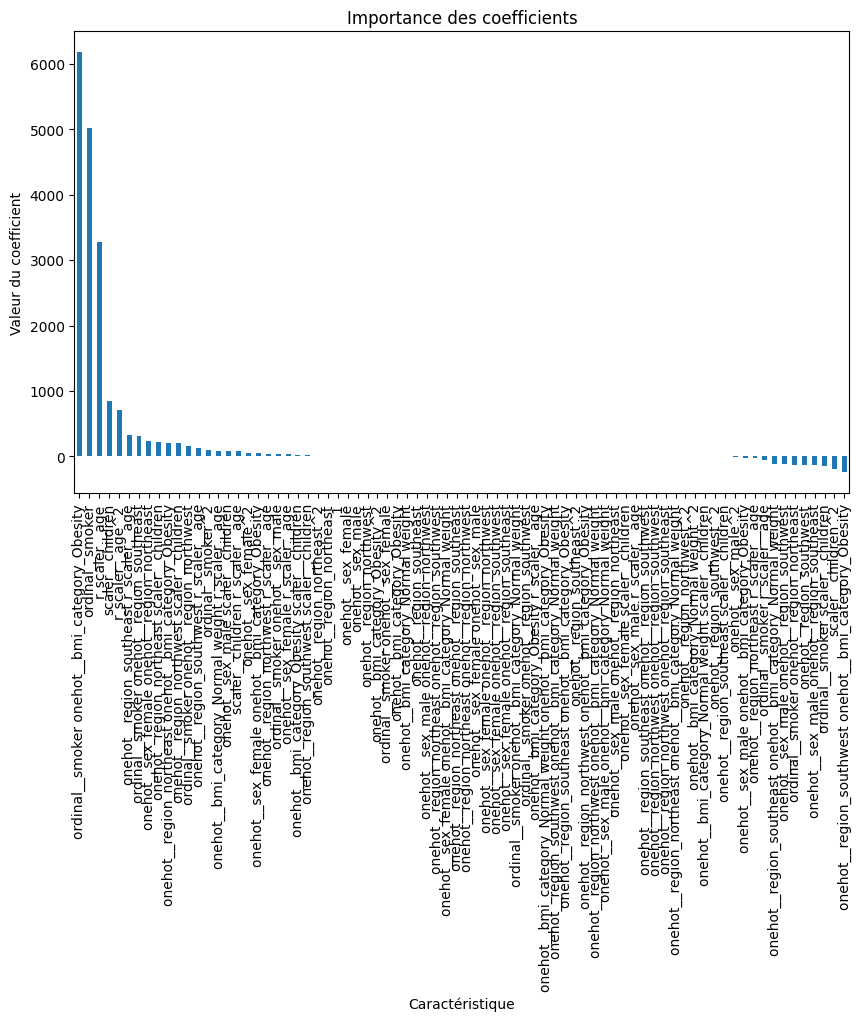

In [164]:
#Analyse des coefficients

#Pipeline avec des noms explicites pour chaque étape
pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("polynomial", polynomial),
    ("scaler", StandardScaler()),
    ("lasso", Lasso(alpha=10, random_state=42))
])


pipe.fit(X_train, y_train)

#Extraire les coefficients
coef = pipe.named_steps['lasso'].coef_

#Extraction les noms des caractéristiques après le préprocesseur
features = pipe.named_steps['preprocessor'].get_feature_names_out()
poly_features = pipe.named_steps['polynomial'].get_feature_names_out(features)

#DataFrame des coefficients
coefficients_df = pd.DataFrame({"Feature": poly_features, "Coefficient": coef})
coefficients_df = coefficients_df.sort_values(by="Coefficient", ascending=False)

print(coefficients_df)

#Visualisation des coefficients
coefficients_df.plot(kind='bar', x='Feature', y='Coefficient', figsize=(10, 6), legend=False)
plt.title("Importance des coefficients")
plt.ylabel("Valeur du coefficient")
plt.xlabel("Caractéristique")
plt.show()


In [165]:
#Interactions Polynomiales

poly_features = pipe.named_steps['polynomial'].get_feature_names_out(features)
poly_coefficients_df = pd.DataFrame({"Feature": poly_features, "Coefficient": coef})
poly_coefficients_df = poly_coefficients_df.sort_values(by="Coefficient", ascending=False)
print(poly_coefficients_df.head(10))  # Affiche les 10 interactions les plus influentes


                                              Feature  Coefficient
20       ordinal__smoker onehot__bmi_category_Obesity  6172.184646
1                                     ordinal__smoker  5023.053783
11                                      r_scaler__age  3277.289531
10                                   scaler__children   840.553950
77                                    r_scaler__age^2   715.541575
62             onehot__region_southeast r_scaler__age   322.253119
17           ordinal__smoker onehot__region_southeast   314.101411
25        onehot__sex_female onehot__region_northeast   239.748805
48          onehot__region_northeast scaler__children   216.945475
47  onehot__region_northeast onehot__bmi_category_...   208.406373


In [153]:
#Validation croisée

scores = cross_val_score(pipe, X, y, cv=5, scoring='r2')
print(f"Scores de validation croisée : {scores}")
print(f"Score moyen : {scores.mean()}, Écart-type : {scores.std()}")

Scores de validation croisée : [0.88698415 0.79127176 0.88894856 0.84858009 0.87254254]
Score moyen : 0.8576654208041544, Écart-type : 0.03619451208364453


L'écart type semble assez faible donc le modèle est robuste

In [154]:
##Analyse d'erreur

#Comparaison valeurs prédites et réelles
error_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred, "Residual": residuals})
error_df['Relative_Error'] = error_df['Residual'] / error_df['Actual']
print(error_df.sort_values(by='Residual', ascending=False).head(10))  # Plus grandes erreurs


           Actual     Predicted      Residual  Relative_Error
805   28476.73499   8259.351107  20217.383883        0.709961
1302  37829.72420  20376.087846  17453.636354        0.461374
115   30259.99556  13207.456895  17052.538665        0.563534
875   26140.36030  10665.587242  15474.773058        0.591988
916   35069.37452  20512.318667  14557.055853        0.415093
963   26467.09737  12685.518939  13781.578431        0.520706
443   28287.89766  15282.016047  13005.881613        0.459768
1002  21232.18226   8817.841744  12414.340516        0.584695
582   17626.23951   5732.494361  11893.745149        0.674775
45    20630.28351  10391.306667  10238.976843        0.496308


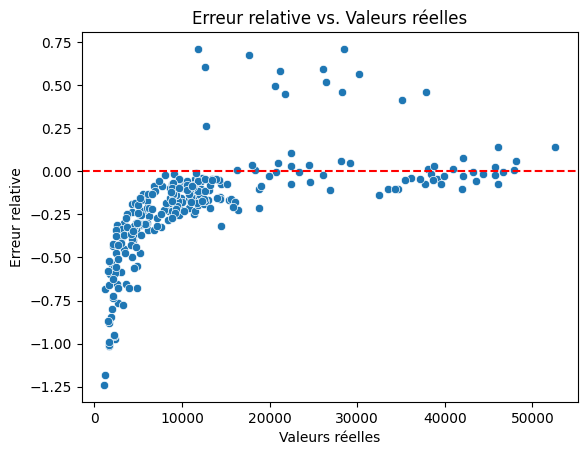

In [155]:
sns.scatterplot(data=error_df, x='Actual', y='Relative_Error')
plt.axhline(0, color='red', linestyle='--')
plt.title("Erreur relative vs. Valeurs réelles")
plt.xlabel("Valeurs réelles")
plt.ylabel("Erreur relative")
plt.show()


On a tendance à sous-estimer les petites charges je crois (plus de l'intuition que du sure à 100%)

## Possibilité d'amélioration
7. Tests d'Assomptions

Si vous utilisez une régression, vérifiez que les hypothèses du modèle sont respectées.

    Linéarité : Les relations entre les prédicteurs et la cible doivent être linéaires (sinon, transformations supplémentaires).
    Homoscédasticité : Les résidus devraient avoir une variance constante (vérifié via le graphique des résidus).
    Indépendance des erreurs : Assurez-vous que les erreurs ne présentent pas de schéma temporel ou structurel.
    Normalité des erreurs : Les erreurs doivent suivre une distribution normale (via Shapiro-Wilk ou Kolmogorov-Smirnov).

8. Essai d'autres Modèles

Pour confirmer que votre modèle est le meilleur choix :

    Essayez des modèles non linéaires comme Gradient Boosting ou Random Forest.
    Comparez leurs performances avec votre modèle actuel.

## Export du modèle sous format pickle

In [170]:
X = df.drop(columns=["charges"]) 
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['smoker'])

pipe.fit(X_train, y_train)
#Sauvegarde du pipeline
with open("model_pipeline.pkl", "wb") as file:
    pickle.dump(pipe, file)

In [173]:
with open("model_pipeline.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Test avec un échantillon
sample_data = X_test.iloc[0:1]  # Exemple de données
prediction = loaded_model.predict(sample_data)
print(f"Prédiction : {prediction}")

#Ca a l'air de marcher cette histoire


Prédiction : [12879.11942128]


In [176]:
score_train = pipe.score(X_train, y_train)
score_test = pipe.score(X_test, y_test)
print(f'score train : {score_train} - score test : {score_test}')

score train : 0.8545506974837287 - score test : 0.9143284644637701


In [215]:
df1 = pd.read_csv('cleansed_data.csv')
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [237]:
# Définir les fonctions pour transformer le BMI
def transform_bmi(X):
    bins = [0, 29.999, 100]
    labels = ['Normal weight', 'Obesity']
    X = X.copy()
    X["bmi_category"] = pd.cut(X['bmi'], bins=bins, labels=labels, right=False)
    return X

In [239]:
from sklearn.preprocessing import FunctionTransformer

# Fonction personnalisée pour intégrer cette transformation
bmi_transformer = FunctionTransformer(transform_bmi)

# Séparer les données
X = df1.drop(columns=["charges"])
y = df1["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['smoker'])

# Pipeline de prétraitement
preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(), ["smoker"]),  # Encodage ordinal pour 'smoker'
        ("onehot", OneHotEncoder(sparse_output=False), ["sex", "region", "bmi_category"]),  # OneHotEncoding
        ("scaler", StandardScaler(), ["children"]),
        ("r_scaler", RobustScaler(), ["age"])
    ],
    remainder="drop"  # Suppression des colonnes non spécifiées
)

# Création du pipeline final
pipe = make_pipeline(
    bmi_transformer,            # Étape de transformation BMI
    preprocessor,               # Étape de prétraitement
    PolynomialFeatures(degree=2, interaction_only=False),
    StandardScaler(),
    Lasso(alpha=10, random_state=42)
)

# Entraînement du pipeline
pipe.fit(X_train, y_train)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function transform_bmi at 0x7b7c6999dbc0>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(),
                                                  ['smoker']),
                                                 ('onehot',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['sex', 'region',
                                                   'bmi_category']),
                                                 ('scaler', StandardScaler(),
                                                  ['children']),
                                                 ('r_scaler', RobustScaler(),
                                                  ['age'])])),
                ('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=10, random_state=42))])

In [240]:
score_train = pipe.score(X_train, y_train)
score_test = pipe.score(X_test, y_test)
print(f'score train : {score_train} - score test : {score_test}')

score train : 0.8545699538403492 - score test : 0.9143316826617246


In [241]:
X = df1.drop(columns=["charges"]) 
y = df1["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['smoker'])

pipe.fit(X_train, y_train)
#Sauvegarde du pipeline
with open("model_pipeline.pkl", "wb") as file:
    pickle.dump(pipe, file)

In [242]:
with open("model_pipeline.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Test avec un échantillon
sample_data = X_test.iloc[0:1]  # Exemple de données
prediction = loaded_model.predict(sample_data)
print(f"Prédiction : {prediction}")


Prédiction : [12879.11942128]
